In [2]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
import sklearn.datasets


In [3]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset1.columns=["x","y"]

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])
dataset2.columns=["x","y"]

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])
dataset3.columns=["x","y"]

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])
dataset4.columns=["x","y"]

dataset5= pd.read_csv("dataset5.csv",header = None)
dataset5.columns=["x","y"]

dataset6= pd.read_csv("dataset6.csv",header = None)
dataset6.columns=["x","y"]

dataset7= pd.read_csv("dataset7.csv",header = None)
dataset7.columns=["x","y"]

dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
# datasets=[dataset1]
# z = StandardScaler()
# dataset6[["x","y"]] = z.fit_transform(dataset6)
# ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import seaborn as sns

In [124]:
def plotGraphs(dataset, kmeans, Agg, DBscan):
    km = "KMeans"
    agg = "AgglomerativeClustering"
    dbs = "DBSCAN"
    dataset[ km ] = kmeans.fit_predict (dataset[["x","y"]])
    dataset[ agg ] = Agg.fit_predict (dataset[["x","y"]])
    dataset[ dbs ] = DBscan.fit_predict (dataset[["x","y"]])
    fig, axes = plt.subplots(1,4, figsize=(20,5))
    sns.color_palette("tab10")

    axes[0].set_title("Original")
    sns.scatterplot(data=dataset, x="x" , y="y" , ax = axes[0])

    axes[1].set_title(km)
    sns.scatterplot(data=dataset, x="x" , y="y" ,hue= km , ax = axes[1], palette = "bright")

    axes[2].set_title(agg)
    sns.scatterplot(data=dataset, x="x" , y="y" ,hue= agg , ax = axes[2], palette = "bright")

    axes[3].set_title(dbs)
    sns.scatterplot(data=dataset, x="x" , y="y" ,hue= dbs, ax = axes[3], palette = "bright")

    plt.show()

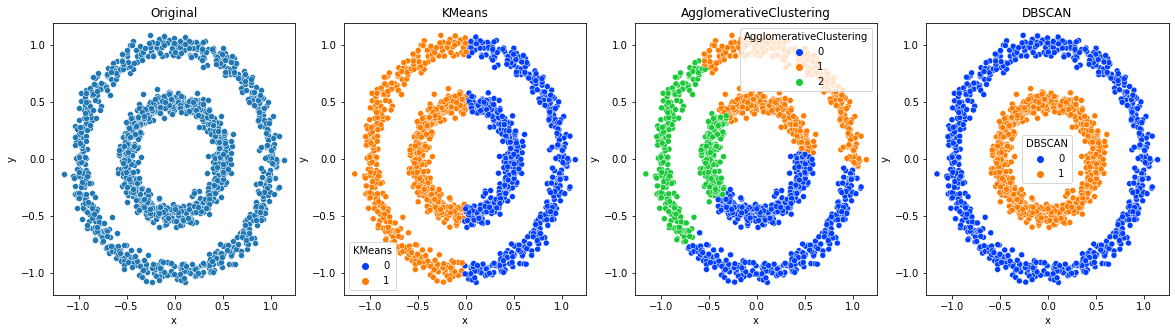

In [125]:
dataset = dataset1.copy()
kmeans = KMeans(n_clusters=2, random_state=0 , n_init = 50  )
Agg = AgglomerativeClustering(n_clusters = 3)
DBscan = DBSCAN(eps=0.2, min_samples=5)

plotGraphs(dataset, kmeans, Agg, DBscan)

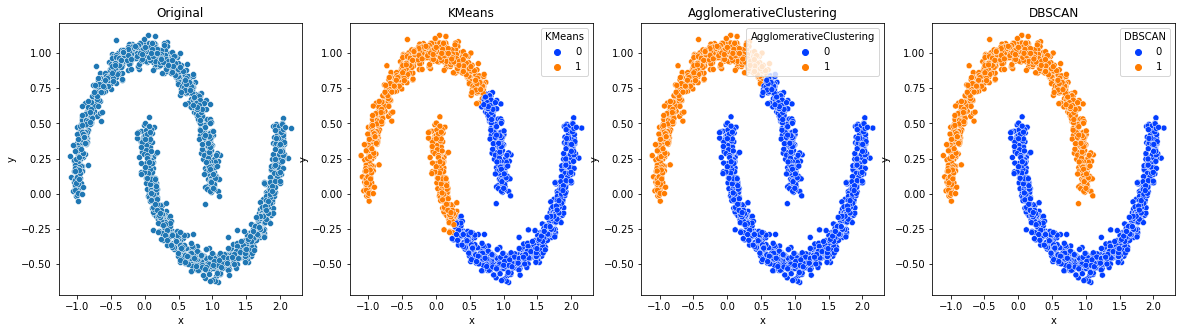

In [369]:
dataset = dataset2.copy()
kmeans = KMeans(n_clusters=2, random_state=0)
Agg = AgglomerativeClustering(n_clusters = None,distance_threshold= 25)

DBscan = DBSCAN(eps=0.15, min_samples=5)

plotGraphs(dataset, kmeans, Agg, DBscan)

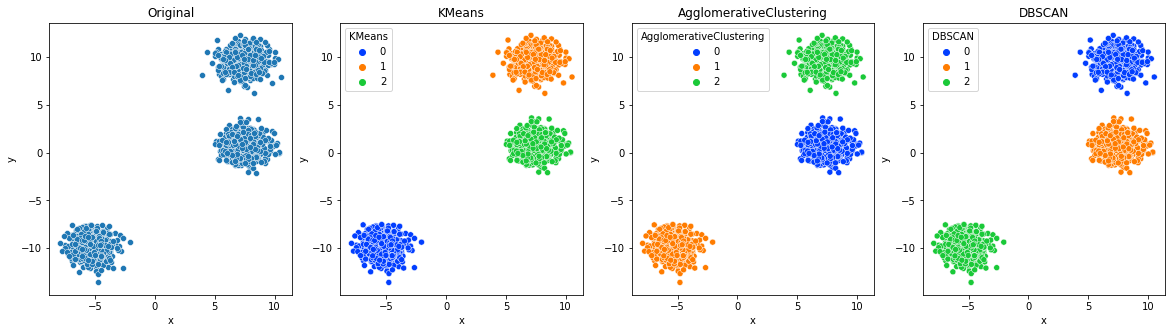

In [127]:
dataset = dataset3.copy()
kmeans = KMeans(n_clusters=3, random_state=0)
Agg = AgglomerativeClustering(n_clusters = 3)
DBscan = DBSCAN(eps=2, min_samples=5)

plotGraphs(dataset, kmeans, Agg, DBscan)


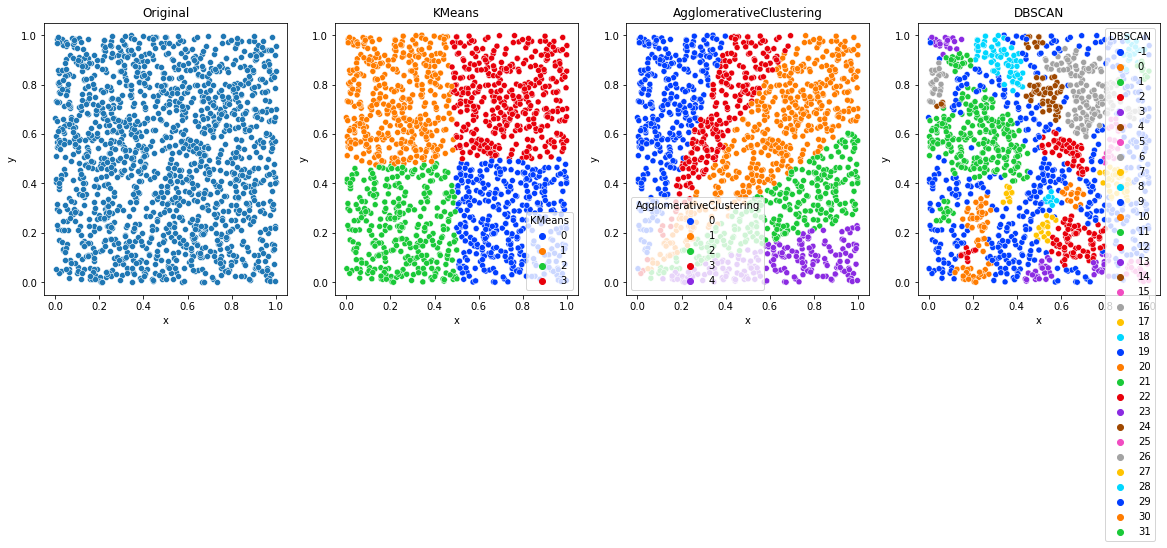

In [340]:
dataset = dataset4.copy()
kmeans = KMeans(n_clusters=4, random_state=0)
Agg = AgglomerativeClustering(n_clusters = None,linkage="complete" , affinity="cosine",distance_threshold= 0.1)
DBscan = DBSCAN(eps=0.04, min_samples=10)

plotGraphs(dataset, kmeans, Agg, DBscan)


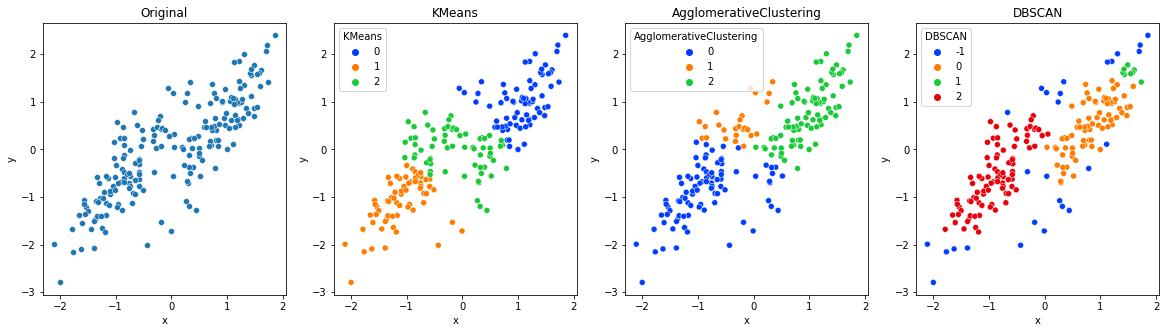

In [370]:
dataset = dataset5.copy()
kmeans = KMeans(n_clusters=3, random_state=2)
Agg = AgglomerativeClustering(n_clusters = None,linkage="complete" , affinity="cosine",distance_threshold= 1.9)
DBscan = DBSCAN(eps=0.25876, min_samples=5)

plotGraphs(dataset, kmeans, Agg, DBscan)


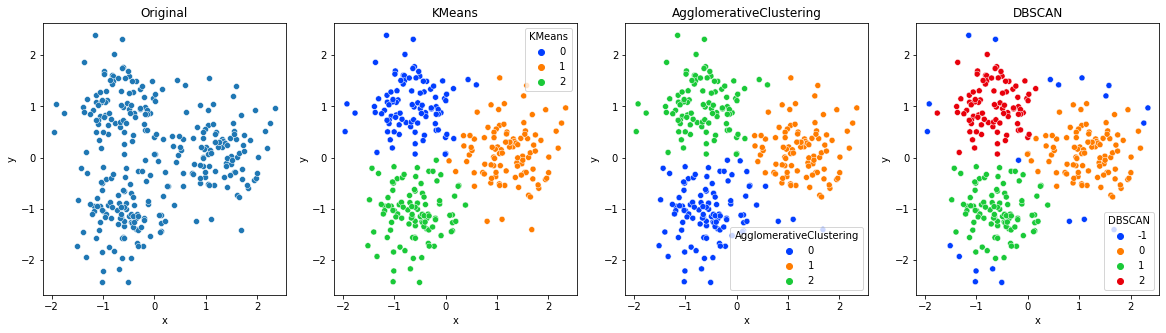

In [372]:
dataset = dataset6.copy()
kmeans = KMeans(n_clusters=3, random_state=0)
Agg = AgglomerativeClustering(n_clusters = 3, linkage="average" , affinity="cosine")
DBscan = DBSCAN(eps=0.5, min_samples=20)

plotGraphs(dataset, kmeans, Agg, DBscan)


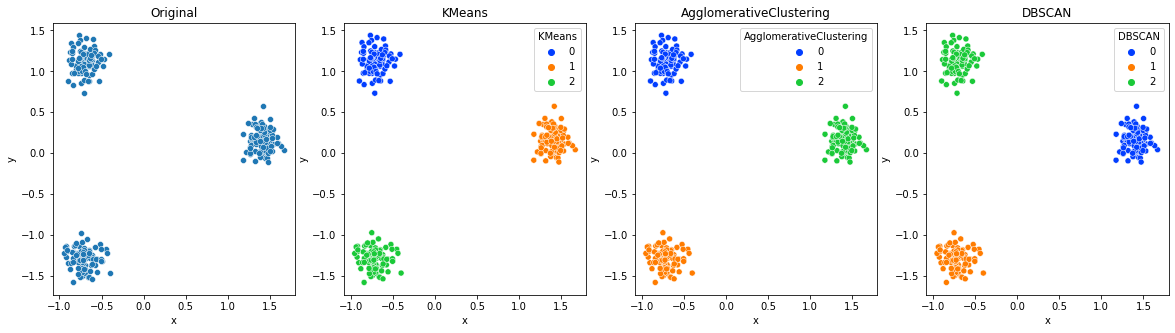

In [131]:
dataset = dataset7.copy()
kmeans = KMeans(n_clusters=3, random_state=0)
Agg = AgglomerativeClustering(n_clusters = 3)
DBscan = DBSCAN(eps=0.5, min_samples=5)

plotGraphs(dataset, kmeans, Agg, DBscan)


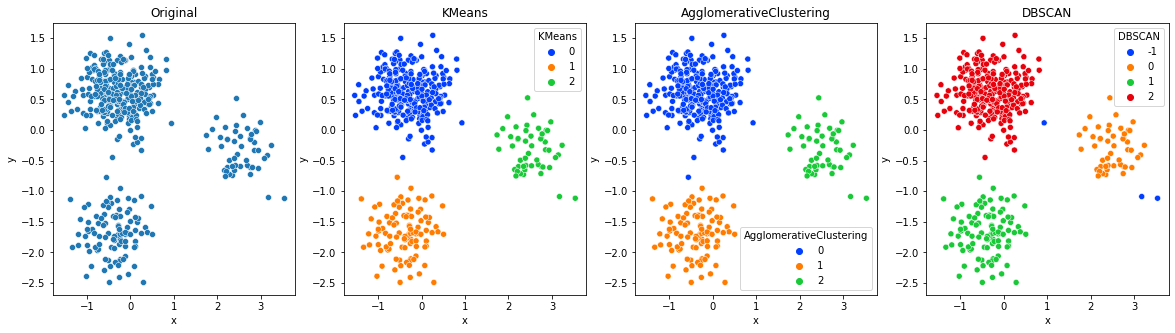

In [257]:
dataset = dataset8.copy()
kmeans = KMeans(n_clusters=3, random_state=0)
Agg = AgglomerativeClustering(n_clusters = None ,linkage="ward" , affinity="euclidean",distance_threshold= 20)
DBscan = DBSCAN(eps=0.355, min_samples=5)

plotGraphs(dataset, kmeans, Agg, DBscan)


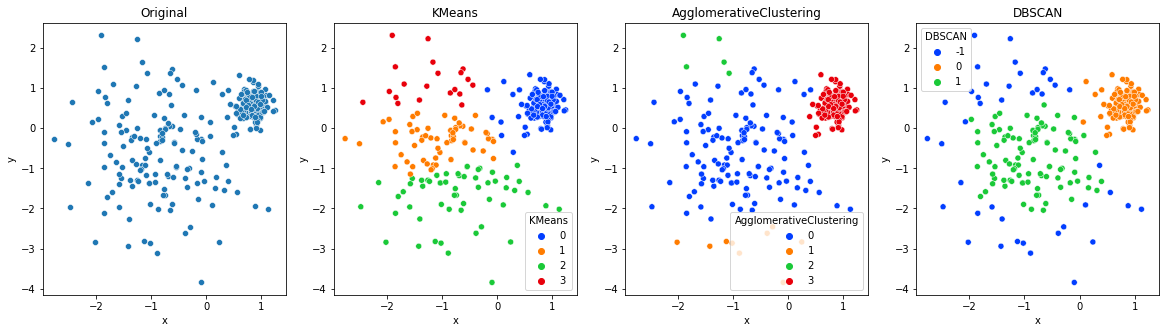

In [224]:
dataset = dataset9.copy()
kmeans = KMeans(n_clusters=4, random_state=10)
Agg = AgglomerativeClustering(n_clusters = None,linkage="average" , affinity="l1",distance_threshold= 2.5)
DBscan = DBSCAN(eps=0.45, min_samples=10)

plotGraphs(dataset, kmeans, Agg, DBscan)


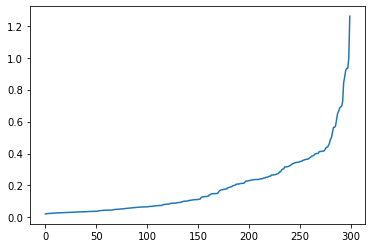

In [91]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)
nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)
